In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [2]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col = 'DATE')

In [3]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [40]:
df.shape

(337, 1)

In [4]:
df.columns = ['sales']

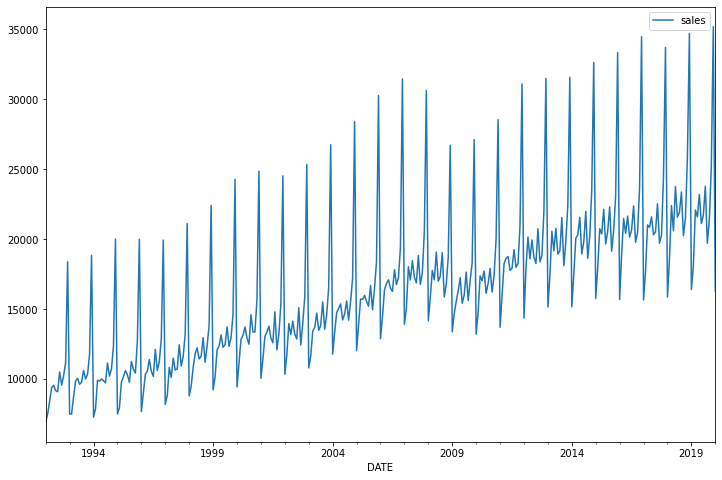

In [5]:
df.plot(figsize = [12, 8])

In [6]:
test_size = 18
test_index = len(df) - test_size

In [7]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [11]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train , length=length, batch_size=1)

In [12]:
n_features = 1

In [13]:
model = Sequential()

In [14]:
model.add(LSTM(100,activation='relu', input_shape=[length,n_features]))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [17]:
validaion_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [18]:
model.fit_generator(generator, epochs=20, validation_data=validaion_generator, callbacks = [early_stop])

Epoch 1/20
307/307 [==============================] - 17s 55ms/step - loss: 0.0242 - val_loss: 0.0454
Epoch 2/20
307/307 [==============================] - 15s 50ms/step - loss: 0.0181 - val_loss: 0.0332
Epoch 3/20
307/307 [==============================] - 15s 49ms/step - loss: 0.0104 - val_loss: 0.0083
Epoch 4/20
307/307 [==============================] - 17s 56ms/step - loss: 0.0056 - val_loss: 0.0057
Epoch 5/20
307/307 [==============================] - 18s 58ms/step - loss: 0.0025 - val_loss: 0.0098
Epoch 6/20
307/307 [==============================] - 15s 50ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 7/20
307/307 [==============================] - 15s 50ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 8/20
307/307 [==============================] - 15s 49ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 9/20
307/307 [==============================] - 15s 49ms/step - loss: 0.0015 - val_loss: 0.0015


In [19]:
losses = pd.DataFrame(model.history.history)

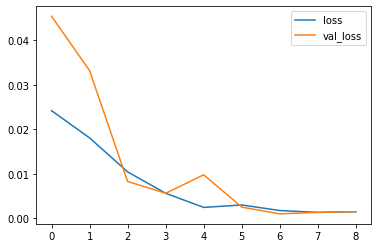

In [20]:
losses.plot()

In [21]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [22]:
true_predictions = scaler.inverse_transform(test_predictions)

In [23]:
test['predictions'] = true_predictions

/home/sinisha/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
test

,sales,predictions
DATE,,
2018-08-01,23381,22848.026836
2018-09-01,20260,20873.186700
2018-10-01,21473,21309.833186
2018-11-01,25831,24530.435119
2018-12-01,34706,34948.073219
2019-01-01,16410,17418.983396
2019-02-01,18134,19628.022501
2019-03-01,22093,22566.015172
2019-04-01,21597,21299.846419


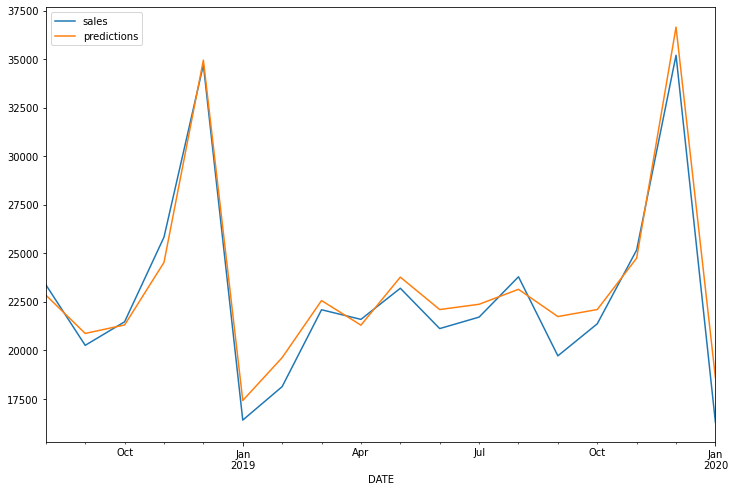

In [25]:
test.plot(figsize = (12,8))

In [26]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [27]:
scaled_full_data.shape

(337, 1)

In [28]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data, length=length, batch_size=1)

In [29]:
model = Sequential()
model.add(LSTM(50, input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [30]:
model.fit_generator(generator, epochs=20)

Epoch 1/20
325/325 [==============================] - 15s 47ms/step - loss: 0.0214
Epoch 2/20
325/325 [==============================] - 15s 46ms/step - loss: 0.0193
Epoch 3/20
325/325 [==============================] - 15s 46ms/step - loss: 0.0189
Epoch 4/20
325/325 [==============================] - 17s 52ms/step - loss: 0.0176
Epoch 5/20
325/325 [==============================] - 17s 53ms/step - loss: 0.0162
Epoch 6/20
325/325 [==============================] - 21s 64ms/step - loss: 0.0163
Epoch 7/20
325/325 [==============================] - 25s 77ms/step - loss: 0.0152
Epoch 8/20
325/325 [==============================] - 27s 83ms/step - loss: 0.0147
Epoch 9/20
325/325 [==============================] - 39s 119ms/step - loss: 0.0134
Epoch 10/20
325/325 [==============================] - 33s 102ms/step - loss: 0.0130
Epoch 11/20
325/325 [==============================] - 27s 83ms/step - loss: 0.0116
Epoch 12/20
325/325 [==============================] - 26s 80ms/step - loss: 0.0088

In [31]:
test_predictions = []
periods = 12
#first_eval_batch = scaled_train[-length:]
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(periods):
    current_predict = model.predict(current_batch)[0]
    test_predictions.append(current_predict)
    current_batch = np.append(current_batch[:,1:,:],[[current_predict]] ,axis = 1)

In [32]:
forecast_predictions = scaler.inverse_transform(test_predictions)

In [33]:
df

,sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-09-01,19719
2019-10-01,21369
2019-11-01,25169


In [34]:
forecast_predictions

array([[21007.76425838],
       [24435.81612158],
       [24477.42300034],
       [25326.85477352],
       [23433.89857721],
       [24160.88368511],
       [25074.18939686],
       [23136.13596058],
       [26283.53060389],
       [32012.81734562],
       [38962.98351574],
       [20199.83429193]])

In [35]:
forecast_index = pd.date_range(start = '2020-02-01', periods= periods, freq="MS")

In [36]:
forecast_index

DatetimeIndex(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [37]:
forecast = pd.DataFrame(data = forecast_predictions, index = forecast_index, columns=['forecast'])

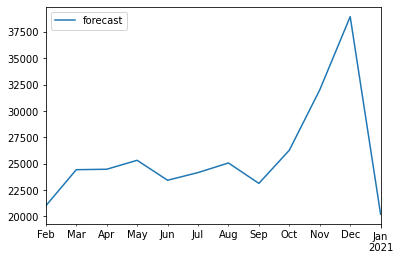

In [38]:
forecast.plot()

(588.0, 614.0)

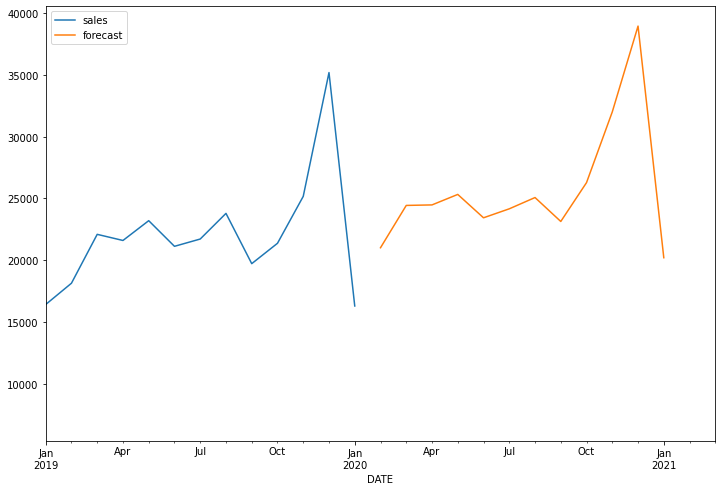

In [39]:
ax = df.plot(figsize=[12, 8])
forecast.plot(ax=ax)
plt.xlim('2019-01-01','2021-03-01')